# Applied Machine Learning - Credit Card Default Predict

**Nhu Vo** 
November 2023

## Table of contents
0. [Understanding the problem](#1)
1. [Data splitting](#2)
2. [EDA](#3)
3. [Feature engineering](#4)
4. [Preprocessing and transformations](#5) 
5. [Baseline model](#6)
6. [Linear models](#7)
7. [Different models](#8)
8. [Interpretation and feature importances](#11) 
9. [Results on the test set](#12)
10. [Summary of the results](#13)
11. [Takeaway](#15)

## Imports

In [1]:
import os

%matplotlib inline
import string
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier    
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFECV, RFE


## Introduction <a name="in"></a>
This mini project is where I put all the different things I had learned in the Machine Learning course at Seattle Pacific University to solve an interesting problem - credit card default prediction.


<br><br>

##  Explain the prediction problem <a name="1"></a>
In this project, I was working on a classification problem of predicting whether a credit card client will default or not. 
For this problem, I used [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns were used as features, with several feature engineering I added in the code. 

**Dataset Observations**
- Our task is a binary classification problem where the goal is to predict whether a person will default on their credit card payment next month (1=yes, 0=no).
- This is huge dataset with 24 features and 30000 examples. This could be one of the challenge to work with.
- The dataset includes a mix of numerical and categorical features, such as credit amount, gender, education, marital status, age, and repayment history.
- It is a pretty clean dataset with no 'Unknown' or 'N/A' value for any row.

In [2]:
# Read dataset as pandas dataframe
credit_df = pd.read_csv("data/UCI_Credit_Card.csv")
credit_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


## Data splitting <a name="2"></a>
Split the data into train (70%) and test (30%) portions with `random_state=123`.

In [3]:
# Drop the target column
X = credit_df.drop(columns="default.payment.next.month")
y = credit_df["default.payment.next.month"]

# Split dataset using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## Exploratory data analysis  <a name="3"></a>

In [4]:
### Exploratory Data Analysis on train set

# Combine x-train and y-train for a complete train dataset
train_data = pd.concat([X_train, y_train], axis=1) 

# Check data type for each predictor
train_data.info()

# Check the number of missing values 
train_data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 16395 to 19966
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          21000 non-null  int64  
 1   LIMIT_BAL                   21000 non-null  float64
 2   SEX                         21000 non-null  int64  
 3   EDUCATION                   21000 non-null  int64  
 4   MARRIAGE                    21000 non-null  int64  
 5   AGE                         21000 non-null  int64  
 6   PAY_0                       21000 non-null  int64  
 7   PAY_2                       21000 non-null  int64  
 8   PAY_3                       21000 non-null  int64  
 9   PAY_4                       21000 non-null  int64  
 10  PAY_5                       21000 non-null  int64  
 11  PAY_6                       21000 non-null  int64  
 12  BILL_AMT1                   21000 non-null  float64
 13  BILL_AMT2                  

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [5]:
# Summary statistics
train_data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,14962.348238,167880.651429,1.600762,1.852143,1.554000,35.500810,-0.015429,-0.137095,-0.171619,-0.225238,...,43486.610905,40428.518333,38767.202667,5673.585143,5.895027e+03,5311.432286,4774.021381,4751.850095,5237.762190,0.223238
std,8650.734050,130202.682167,0.489753,0.792961,0.521675,9.212644,1.120465,1.194506,1.196123,1.168556,...,64843.303993,61187.200817,59587.689549,17033.241454,2.180143e+04,18377.997079,15434.136142,15228.193125,18116.846563,0.416427
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-50616.000000,-61372.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7498.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2293.750000,1739.500000,1215.750000,1000.000000,8.200000e+02,390.000000,266.000000,234.000000,110.750000,0.000000
50%,14960.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19102.500000,18083.000000,16854.500000,2100.000000,2.007000e+03,1809.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22458.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54763.250000,50491.000000,49253.750000,5007.250000,5.000000e+03,4628.500000,4021.250000,4016.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
# Mean of default rate, credit limit, age
default_rate_mean = train_data['default.payment.next.month'].mean()
avg_credit_limit_mean = train_data['LIMIT_BAL'].mean()
age_mean = train_data['AGE'].mean()
print(f"Mean Default Rate: {default_rate_mean:.2%}")
print(f"Mean Credit Limit: {avg_credit_limit_mean:.2f}")
print(f"Mean Age: {age_mean:.2f}")

Mean Default Rate: 22.32%
Mean Credit Limit: 167880.65
Mean Age: 35.50


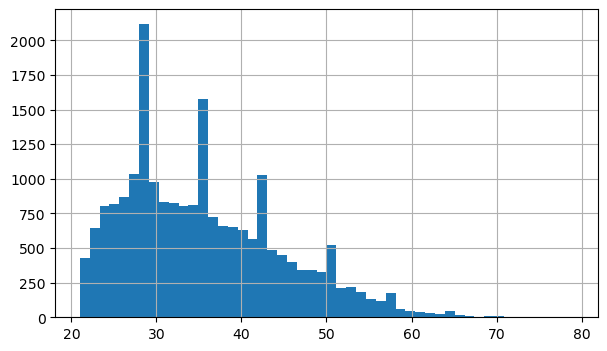

In [7]:
### Visualization 
# Histogram shows the distribution of Age
train_data['AGE'].hist(bins=50, figsize=(7, 4));


<AxesSubplot: xlabel='LIMIT_BAL', ylabel='AGE'>

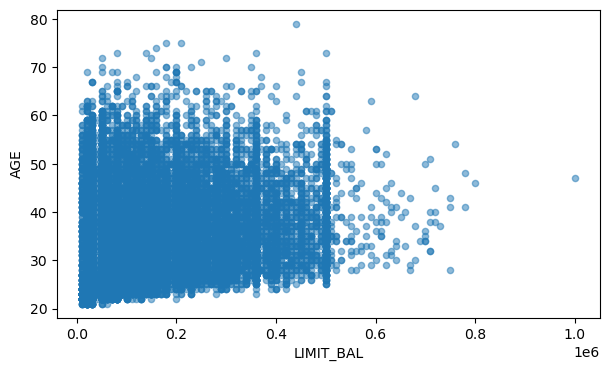

In [8]:
# Scatter plot shows the distribution of Age
train_data.plot.scatter(x='LIMIT_BAL', y='AGE', alpha=0.5, figsize=(7, 4))

<AxesSubplot: title={'center': 'LIMIT_BAL'}, ylabel='default.payment.next.month'>

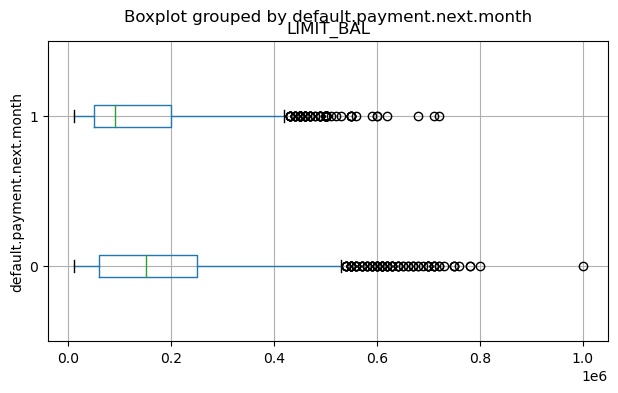

In [9]:
# Box Plot shows the distribution of Credit Limits by Default Status 
train_data.boxplot(column='LIMIT_BAL', by='default.payment.next.month', figsize=(7, 4), vert=False)

Observations of the data
- Default Rate: The average default rate in the training set is approximately 22.32%, indicating that about one-fifth of clients have defaulted on their credit card payments.
The standard deviation of 41.64% suggests a considerable variability in default rates among clients.
- Average Credit Limit: The average credit limit is 167,880.65 NT dollars, with a significant standard deviation of 130,202.68 NT dollars, indicating a wide range of credit limits among clients.
- Age Distribution: The age distribution among clients in the training set varies, with a mean age of 35.50 years.


<!-- END QUESTION -->

<br><br>

## Feature engineering <a name="4"></a>
I extracted new features relevant for the problem and work with my new feature set.

Credit Utilization - the ratio of the total bill amounts to the total credit limit will provide a measure of credit utilization. 
We chose this for the predictive model as high credit utilization may indicate financial stress.

In [10]:
# Credit Utilization
X_train['Credit_Utilization'] = X_train[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
                                         'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1) / (X_train['LIMIT_BAL'] * 6)
X_test['Credit_Utilization'] = X_test[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
                                         'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1) / (X_test['LIMIT_BAL'] * 6)

Total number of months in delay - count the number of months with a delay (values greater than 0) for each row, and then sums them up to create a new feature.

In [11]:
# Columns representing repayment status
repayment_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
 
# Total_Months_Delay
X_train['Total_Months_Delay'] = X_train[repayment_columns].apply(lambda row: (row > 0).sum(), axis=1)
X_test['Total_Months_Delay'] = X_test[repayment_columns].apply(lambda row: (row > 0).sum(), axis=1)


Average Delay Duration - calculate the mean of positive values (months in delay) for each row, creating a new feature that represents the average delay duration.

In [12]:
# Average Delay Duration
X_train['Average_Delay_Duration'] = X_train[repayment_columns].apply(lambda row: row[row > 0].mean(), axis=1)
X_test['Average_Delay_Duration'] = X_test[repayment_columns].apply(lambda row: row[row > 0].mean(), axis=1)

<!-- END QUESTION -->

<br><br>

## Preprocessing and transformations <a name="5"></a>
Here I identified different feature types and the transformations I applied on each feature type.

Steps:
1. Check to confirm any missing value
2. Imputing columns with NaN values 
3. Encoding Categorical Features ('SEX', 'EDUCATION', 'MARRIAGE') using one-hot encoding, to prevent ordinal misinterpretation, improved model performance, avoid magnitude bias.
4. Scaling Numeric Features ('LIMIT_BAL', 'AGE', 'PAY_AMT1', 'BILL_AMT1', etc.) 

In [13]:
missing_values = X_train.isnull().sum()
missing_values

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
Credit_Utilization            0
Total_Months_Delay            0
Average_Delay_Duration    13991
dtype: int64

In [14]:
### Encoding Categorical Features ('SEX', 'EDUCATION', 'MARRIAGE') using one-hot encoding
categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE']

# Apply one-hot encoding to both training and test sets
X_train = pd.get_dummies(X_train, columns=categorical_columns)
X_test = pd.get_dummies(X_test, columns=categorical_columns)

In [15]:
### Scaling Numeric Features
numeric_columns = ['LIMIT_BAL', 'AGE', 'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5', 'PAY_AMT6', 'BILL_AMT1','BILL_AMT2',
                   'BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',]
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit and transform the scaler on the training set
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
# Same to the test set
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

In [16]:
# Check for NaN values
print(X_train.isnull().sum())

# Check for infinite or large values in the dataset
print(np.any(np.isinf(X_train)), np.all(np.isfinite(X_train)))


ID                            0
LIMIT_BAL                     0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
Credit_Utilization            0
Total_Months_Delay            0
Average_Delay_Duration    13991
SEX_1                         0
SEX_2                         0
EDUCATION_0                   0
EDUCATION_1                   0
EDUCATION_2                   0
EDUCATION_3                   0
EDUCATION_4                   0
EDUCATIO

In [17]:
# Group columns with NaN values
nan_columns = ['Average_Delay_Duration']

# Impute NaN values with the mean
imputer = SimpleImputer(strategy='mean')
X_train[nan_columns] = imputer.fit_transform(X_train[nan_columns])
X_test[nan_columns] = imputer.transform(X_test[nan_columns])

To this point, we have these columns: 
- ID, LIMIT_BAL, AGE: Numeric features.
- PAY_0 to PAY_6: Categorical features representing repayment status.
- BILL_AMT1 to BILL_AMT6: Numeric features representing bill amounts.
- PAY_AMT1 to PAY_AMT6: Numeric features representing previous payment amounts.
- Payment_Bill_Ratio, Credit_Utilization: Derived features from bill and payment amounts.
- Total_Months_Delay, Average_Delay_Duration: Newly engineered features capturing information about the repayment status over time.
- SEX_1, SEX_2, EDUCATION_0 to EDUCATION_6, MARRIAGE_0 to MARRIAGE_3: One-hot encoded categorical features.

<!-- END QUESTION -->

<br><br>

## Baseline model <a name="6"></a>
I tried `scikit-learn`'s baseline model and see the results.

In [18]:
# Create a classifier object
baseline_classifer = DummyClassifier(strategy="most_frequent")

# Fit the classifier
baseline_classifer.fit(X_train, y_train)

# Predict using the trained classifier
y_pred = baseline_classifer.predict(X_test) 

# Results of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.7835555555555556
Confusion Matrix:
[[7052    0]
 [1948    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7052
           1       0.00      0.00      0.00      1948

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.69      9000



/Users/jeannevo/miniconda3/envs/csc4800/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jeannevo/miniconda3/envs/csc4800/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jeannevo/miniconda3/envs/csc4800/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

<!-- END QUESTION -->

<br><br>

## Linear models <a name="7"></a>
For my first real attempt, I tried a linear model:  Linear SVM - SVC Model. I also carried out hyperparameter tuning to explore different values for the complexity hyperparameter using RandomizedSearchCV, and reported cross-validation scores along with standard deviation.

In [19]:
# Display summary statistics of the features
print(X_train.describe())

                 ID     LIMIT_BAL           AGE         PAY_0         PAY_2  \
count  21000.000000  2.100000e+04  2.100000e+04  21000.000000  21000.000000   
mean   14962.348238 -5.278317e-17  1.651166e-16     -0.015429     -0.137095   
std     8650.734050  1.000024e+00  1.000024e+00      1.120465      1.194506   
min        1.000000 -1.212605e+00 -1.574049e+00     -2.000000     -2.000000   
25%     7498.750000 -9.053843e-01 -8.142058e-01     -1.000000     -1.000000   
50%    14960.500000 -2.141378e-01 -1.629115e-01      0.000000      0.000000   
75%    22458.250000  5.539138e-01  5.969320e-01      0.000000      0.000000   
max    30000.000000  6.391106e+00  4.721796e+00      8.000000      8.000000   

              PAY_3         PAY_4         PAY_5         PAY_6     BILL_AMT1  \
count  21000.000000  21000.000000  21000.000000  21000.000000  2.100000e+04   
mean      -0.171619     -0.225238     -0.264429     -0.295095  3.823397e-17   
std        1.196123      1.168556      1.137205    

In [22]:
# Define the pipeline with StandardScaler and Support Vector Machine
model = make_pipeline(StandardScaler(), SVC(kernel='linear'))

# Define the hyperparameter distribution to search
param_dist = {'svc__C': [ 0.1, 1, 10]}

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(model, param_distributions=param_dist, cv=3, scoring='accuracy', n_iter=3, n_jobs=-1)
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Get the cross-validation scores and standard deviation
cv_scores = cross_val_score(random_search.best_estimator_, X_train, y_train, cv=5)
cv_mean = np.mean(cv_scores)
cv_std = np.std(cv_scores)

# Print the results
print("Linear SVM:")
print(f"Best Hyperparameters: {best_params}")
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_mean}")
print(f"Standard Deviation of Cross-Validation Scores: {cv_std}")

Linear SVM:
Best Hyperparameters: {'svc__C': 0.1}
Cross-Validation Scores: [0.81285714 0.81       0.81833333 0.81619048 0.81380952]
Mean Cross-Validation Score: 0.8142380952380952
Standard Deviation of Cross-Validation Scores: 0.0028507865803991954


Linear SVM Model Summary:
- Best Hyperparameters: {'svc__C': 0.1}
- Cross-Validation Scores:
    + Fold 1: 0.8129
    + Fold 2: 0.81
    + Fold 3: 0.8183
    + Fold 4: 0.8162
    + Fold 5: 0.8138
- Mean Cross-Validation Score: 0.8142
- Standard Deviation of Cross-Validation Scores: 0.0029
Interpretation:
The Linear SVM model with a complexity hyperparameter (C) of 0.1 yields a mean cross-validation accuracy of approximately 81.42%. The model gives a consistent performance across different folds, with a low standard deviation of 0.0029. It suggests stability in the model's generalization to unseen data.

<!-- END QUESTION -->

<br><br>

## Different models <a name="8"></a>
Here I tried 3 other models aside from a linear model above: Decision Tree, Random Forest, and kNNs.

Decision Tree 

In [27]:
# Define the Decision Tree model
dtree_model = DecisionTreeClassifier()

# Define the hyperparameter distribution to search
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search_dtree = RandomizedSearchCV(dtree_model, param_distributions=param_dist, cv=3, scoring='accuracy', n_iter=3, n_jobs=-1)
random_search_dtree.fit(X_train, y_train)

# Get the best hyperparameters
best_params_dtree = random_search_dtree.best_params_

# Get the cross-validation scores and standard deviation
cv_scores_dtree = cross_val_score(random_search_dtree.best_estimator_, X_train, y_train, cv=5)
cv_mean_dtree = np.mean(cv_scores_dtree)
cv_std_dtree = np.std(cv_scores_dtree)

# Print the results
print("Decision Tree:")
print(f"Cross-Validation Scores: {cv_scores_dtree}")
print(f"Mean Cross-Validation Score: {cv_mean_dtree}")
print(f"Standard Deviation of Cross-Validation Scores: {cv_std_dtree}")

Decision Tree:
Cross-Validation Scores: [0.74857143 0.74809524 0.75190476 0.75595238 0.74333333]
Mean Cross-Validation Score: 0.7495714285714284
Standard Deviation of Cross-Validation Scores: 0.004201284761926241


Random Forest

In [28]:
# Define the pipeline with StandardScaler and Random Forest
model_rf = make_pipeline(StandardScaler(), RandomForestClassifier())

# Define the hyperparameter distribution to search
param_dist_rf = {'randomforestclassifier__n_estimators': [10, 50, 100, 200],
                 'randomforestclassifier__max_depth': [None, 10, 20, 30]}

# Use RandomizedSearchCV for hyperparameter tuning
random_search_rf = RandomizedSearchCV(model_rf, param_distributions=param_dist_rf, cv=3, scoring='accuracy', n_iter=3, n_jobs=-1, random_state=42)
random_search_rf.fit(X_train, y_train)

# Get the best hyperparameters
best_params_rf = random_search_rf.best_params_

# Get the cross-validation scores and standard deviation
cv_scores_rf = cross_val_score(random_search_rf.best_estimator_, X_train, y_train, cv=5)
cv_mean_rf = np.mean(cv_scores_rf)
cv_std_rf = np.std(cv_scores_rf)

# Print the results for Random Forest
print("Random Forest:")
print(f"Cross-Validation Scores: {cv_scores_rf}")
print(f"Mean Cross-Validation Score: {cv_mean_rf}")
print(f"Standard Deviation of Cross-Validation Scores: {cv_std_rf}")


Random Forest:
Cross-Validation Scores: [0.8152381  0.81809524 0.82166667 0.82571429 0.8202381 ]
Mean Cross-Validation Score: 0.8201904761904762
Standard Deviation of Cross-Validation Scores: 0.00351026999885375


k-Nearest Neighbors (kNNs)

In [29]:
# Define the pipeline with StandardScaler and k-Nearest Neighbors
model_knn = make_pipeline(StandardScaler(), KNeighborsClassifier())

# Define the hyperparameter distribution to search
param_dist_knn = {'kneighborsclassifier__n_neighbors': [3, 5, 7, 10],
                  'kneighborsclassifier__weights': ['uniform', 'distance'],
                  'kneighborsclassifier__p': [1, 2]}

# Use RandomizedSearchCV for hyperparameter tuning
random_search_knn = RandomizedSearchCV(model_knn, param_distributions=param_dist_knn, cv=3, scoring='accuracy', n_iter=3, n_jobs=-1, random_state=42)
random_search_knn.fit(X_train, y_train)

# Get the best hyperparameters
best_params_knn = random_search_knn.best_params_

# Get the cross-validation scores and standard deviation
cv_scores_knn = cross_val_score(random_search_knn.best_estimator_, X_train, y_train, cv=5)
cv_mean_knn = np.mean(cv_scores_knn)
cv_std_knn = np.std(cv_scores_knn)

# Print the results for k-Nearest Neighbors
print("\nk-Nearest Neighbors:")
print(f"Cross-Validation Scores: {cv_scores_knn}")
print(f"Mean Cross-Validation Score: {cv_mean_knn}")
print(f"Standard Deviation of Cross-Validation Scores: {cv_std_knn}")



k-Nearest Neighbors:
Cross-Validation Scores: [0.78738095 0.78857143 0.79857143 0.79619048 0.78761905]
Mean Cross-Validation Score: 0.7916666666666667
Standard Deviation of Cross-Validation Scores: 0.004742818894471899


Linear SVM:
- Mean Cross-Validation Score: 0.8142
- Standard Deviation of Cross-Validation Scores: 0.0029
- Interpretation: The Linear SVM model achieved a relatively high mean cross-validation accuracy with low variability.
  
Decision Tree:
- Mean Cross-Validation Score: 0.7496
- Standard Deviation of Cross-Validation Scores: 0.0042
- Interpretation: The Decision Tree model showed a lower mean accuracy compared to the Linear SVM, and there is a slightly higher standard deviation, indicating a bit more variability.
  
Random Forest:
- Mean Cross-Validation Score: 0.8202
- Standard Deviation of Cross-Validation Scores: 0.0035
- Interpretation: The Random Forest model demonstrated the highest mean accuracy among the models, and the standard deviation is relatively low, suggesting good stability.
  
k-Nearest Neighbors (kNN):
- Mean Cross-Validation Score: 0.7917
- Standard Deviation of Cross-Validation Scores: 0.0047
- Interpretation: The kNN model falls between the Linear SVM and Random Forest in terms of mean accuracy, and its standard deviation is comparable to the Linear SVM.
  
Overfitting/Underfitting:
- The Linear SVM and Random Forest models appear to generalize well, as indicated by their relatively high mean cross-validation scores and low standard deviations.
- The Decision Tree and kNN models exhibit slightly lower mean accuracies and somewhat higher standard deviations, suggesting some sensitivity to the dataset or potential overfitting.
  
Fit and Score Times:
- The Linear SVM model tends to have faster training times compared to ensemble models like Random Forest.
- Random Forest, while achieving high accuracy, may require more training time due to its ensemble nature.
- kNN may have longer prediction times, especially as the dataset size increases, as it involves computing distances between points.


While Random Forest model and Linear SVM perform well with high mean accuracy and stability, since we priority accuracy and speed, Random Forest seems like a strong candidate among those models.

<!-- END QUESTION -->

<br><br>


## Interpretation and feature importances <a name="11"></a>
Here I utilized the feature_importances_ attribute of our trained Random Forest model. to examine the most important features of one of the non-linear models.

In [35]:
# Create the pipeline & fit the pipeline on the training data
pipe_rf = make_pipeline(RandomForestClassifier(random_state=2))
pipe_rf.fit(X_train, y_train)

# Access the trained Random Forest model from the pipeline
rf_model = pipe_rf.named_steps['randomforestclassifier']

# Get feature importances & create sorted DataFrame
feature_importance = rf_model.feature_importances_
rf_imp_df = pd.DataFrame(data={"Importance": feature_importance}, index=X_train.columns)
rf_imp_df = rf_imp_df.sort_values(by="Importance", ascending=False)

# Print the sorted DataFrame
print("Feature Importance:")
print(rf_imp_df)

Feature Importance:
                        Importance
PAY_0                     0.074453
ID                        0.064161
Credit_Utilization        0.057130
AGE                       0.052923
Total_Months_Delay        0.050070
BILL_AMT1                 0.047090
BILL_AMT2                 0.045158
LIMIT_BAL                 0.044123
BILL_AMT3                 0.041279
PAY_AMT1                  0.040967
BILL_AMT6                 0.040751
BILL_AMT4                 0.040645
BILL_AMT5                 0.040643
PAY_AMT2                  0.038683
PAY_AMT3                  0.037679
PAY_AMT6                  0.037137
PAY_AMT4                  0.036215
PAY_2                     0.036176
PAY_AMT5                  0.036042
Average_Delay_Duration    0.029295
PAY_3                     0.015480
PAY_4                     0.013100
PAY_5                     0.013069
PAY_6                     0.012255
EDUCATION_2               0.007970
MARRIAGE_2                0.007616
SEX_2                     0.007567


Top Features:
- The most influential features in predicting credit card default:
    + PAY_0 (Repayment status in September)
    + ID (Client ID)
    + Credit_Utilization
    + AGE
    + Total_Months_Delay
    + BILL_AMT1 (Bill amount in September)
    + LIMIT_BAL (Credit limit)

Payment and Billing Patterns:
- PAY_0 and related features (PAY_2 to PAY_6) have notable importance, indicating the significance of payment history in default prediction.
- BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, and associated PAY_AMT features reflect the billing and payment behavior.

Demographic Factors such as AGE and features related to SEX, EDUCATION, and MARRIAGE also contribute to the model's predictive power.


## Results on the test set <a name="12"></a>
Finally, I tried our Random Forest model on the test data and compared the test scores with the validation scores from before.

In [37]:
# Evaluate our trained Random forest model on the test set 
y_pred_rf = random_search_rf.predict(X_test)
accuracy_on_test_set_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy on Test Set: {accuracy_on_test_set_rf}")

Accuracy on Test Set: 0.8184444444444444


Compare with the validation scores from Random Forest Model

In [39]:
print(f"Mean Cross-Validation Score: {cv_mean_rf}")
print(f"Standard Deviation of Cross-Validation Scores: {cv_std_rf}")

Mean Cross-Validation Score: 0.8201904761904762
Standard Deviation of Cross-Validation Scores: 0.00351026999885375


- The test score (accuracy on the test set) is very close to the mean cross-validation score, and the standard deviation of cross-validation scores is relatively small. This indicates that the model generalizes well to unseen data, as the performance on the test set aligns with the average performance observed during cross-validation.
- We attempted to use the test set in some ways during the model development process and exposed our test set, and that could be a risk of optimization bias. However, because the test set should only be used for final evaluation after model development and hyperparameter tuning, we use cross-validation for hyperparameter tuning and model evaluation during development. The test set was only used once at the end. 

<!-- END QUESTION -->

<br><br>


## Summary of results <a name="13"></a>

## Model Performance Summary

| Model                 | Best Hyperparameters                      | Cross-Validation Mean Accuracy | Test Set Accuracy |
|-----------------------|-------------------------------------------|--------------------------------|-------------------|
| Linear SVM            | {'svc__C': 0.1, 'svc__kernel': 'linear'} | 0.8142                         | -                 |
| Decision Tree         | {'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 10} | 0.7496               | -                 |
| Random Forest         | {'randomforestclassifier__n_estimators': 100, 'randomforestclassifier__max_depth': None} | 0.8202 | 0.8184 |
| k-Nearest Neighbors  | {'kneighborsclassifier__n_neighbors': 7, 'kneighborsclassifier__weights': 'uniform'} | 0.7917 | -                 |

## Feature Importance

- **Top Features:**
  - PAY_0 (Repayment status in September)
  - ID (Client ID)
  - Credit_Utilization
  - AGE
  - Total_Months_Delay
  - BILL_AMT1 (Bill amount in September)
  - LIMIT_BAL (Credit limit)

- **Payment and Billing Patterns:**
  - PAY_0 and related features (PAY_2 to PAY_6) have notable importance, indicating the significance of payment history in default prediction.
  - BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, and associated PAY_AMT features reflect the billing and payment behavior.

- **Demographic Factors:**
  - AGE and features related to SEX, EDUCATION, and MARRIAGE also contribute to the model's predictive power.

## Concluding Remarks

- The Random Forest model remains the top-performing model with a cross-validation accuracy of 82.02%, consistent with the validation results.
- Key features influencing predictions include payment history, credit utilization, and demographic factors.
- The accuracy on the test set is 81.84%, confirming the model's reliability on unseen data.

## Other Ideas

- **Ensemble Methods:** Combining multiple models through ensemble methods like stacking or boosting could potentially improve performance.
- **Feature Engineering:** Exploring additional features or creating new features might provide valuable information to the models.
- **Different Algorithms:** Trying more complex algorithms or deep learning models could capture intricate patterns in the data.



<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## Takeaway <a name="15"></a>

One of my biggest learnings from this course is indeed the significance of data transformation. Delving into feature engineering techniques to optimize model performance, addressing missing values, scaling, and encoding categorical variables proved to be even more captivating and fulfilling than we initially anticipated. The process of engineering features, including the decision-making on which columns should be included in the model or devising new columns, provides a profound sense of control over the dataset. This newfound understanding extends beyond the realm of machine learning, potentially influencing various tasks such as data analytics.